In [1]:
import nbsetup
import numpy as np
import pandas as pd
import seaborn as sns
from helpers.ergodic import ErgodicEnsemble

https://www.youtube.com/watch?v=LGqOH3sYmQA

[None]

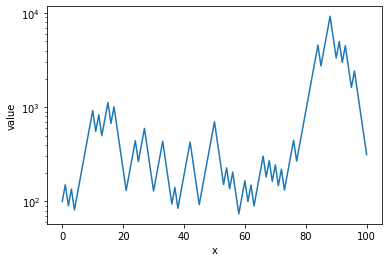

In [2]:
ensembles = 1
timesteps = 100

data = {'x': np.arange(timesteps+1)}
for i in range(ensembles):
    series = [100]
    for t in range(timesteps):
        if np.random.choice([True, False]):
            s = series[t]*1.5
        else:
            s = series[t]*0.6
        series.append(s)
    data[i] = np.array(series)

df = pd.DataFrame(data)
g = sns.lineplot(x='x', y='value', ci=None, hue='variable', data=df.melt(id_vars=['x']), legend=0)
g.set(yscale='log')

In [3]:
# Standardise 
MAX = 200
ENSEMBLES = 7
OBS = 10000

def gen_ee(func):
    data = []
    for i in range(ENSEMBLES):
        row = func()
        data.append(row)
    data = np.array(data)
    bins = np.linspace(int(np.floor(data.min())), int(np.ceil(data.max())), int(OBS/100))
    ee = ErgodicEnsemble(observations=data, bins=bins)
    return ee

In [4]:
eep = gen_ee(lambda: np.random.power(5,OBS)*MAX)
eep.plot()

ValueError: pmf [  0   0   0   0   0   0   0   1   1   0   0   0   0   0   0   0   0   0
   3   2   3   2   6   1   1   4   5   7   9   7  10  17  12  15   9  13
  13  14  15  14  18  26  26  20  31  29  35  42  47  37  36  50  40  46
  48  68  70  77  56  72  89  81  87 115 110 103  98 106 132 127 127 149
 149 170 163 167 195 173 189 209 241 223 234 243 268 291 265 302 294 318
 316 343 354 380 421 415 415 442 438]=10000 is not normalised

In [ ]:
eep.ridge()

In [ ]:
eep.stats()

In [ ]:
def uni_data():
    mu = np.random.normal(MAX/2, 1)
    return np.random.normal(mu, 0.5, 1000)

eeu = gen_ee(uni_data)
eeu.plot()

In [ ]:
eeu.ridge()

In [ ]:
eeu.bars()